In [14]:
import matplotlib.pyplot as plt
import iris
import iris.plot as iplt
import iris.quickplot as qplt

import glob
from iris.experimental.equalise_cubes import equalise_attributes

import numpy

In [15]:
%matplotlib inline

In [16]:
infile = '/g/data/r87/dbi599/DRSv2/CMIP5/CSIRO-Mk3-6-0/piControl/yr/all/r1i1p1/energy-budget/latest/energy-budget_yr_CSIRO-Mk3-6-0_piControl_r1i1p1_all.nc'


In [26]:
ohc_nh_cube = iris.load_cube(infile, 'ocean heat content nh sum')
ohc_sh_cube = iris.load_cube(infile, 'ocean heat content sh sum')
#ohc_global_cube = (ohc_nh_cube + ohc_sh_cube)    # * 60 * 60 * 24 * 365

/g/data/r87/dbi599/miniconda3/envs/ocean/lib/python3.6/site-packages/iris/fileformats/cf.py:1143: IrisDeprecation: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warn_deprecated(msg)
/g/data/r87/dbi599/miniconda3/envs/ocean/lib/python3.6/site-packages/iris/fileformats/cf.py:1143: IrisDeprecation: NetCDF default loading behaviour currently does not expose variables which define reference surfaces for dimensionless vertical coordinates as independent Cubes. This behaviour is deprecated in favour of automatic promotion to Cubes. To switch to the new behaviour, set iris.FUTURE.netcdf_promote to True.
  warn_deprecated(msg)


/g/data/r87/dbi599/miniconda3/envs/ocean/lib/python3.6/site-packages/matplotlib/ticker.py:1693: UserWarning: Steps argument should be a sequence of numbers
increasing from 1 to 10, inclusive. Behavior with
values outside this range is undefined, and will
raise a ValueError in future versions of mpl.
  warnings.warn('Steps argument should be a sequence of numbers\n'


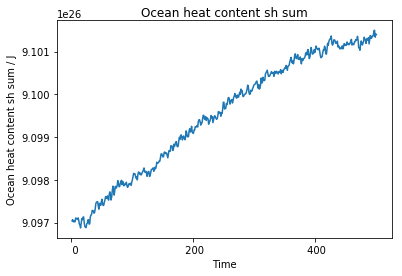

In [27]:
qplt.plot(ohc_sh_cube)
plt.show()

In [19]:
print(ohc_nh_cube)

ocean heat content nh sum / (J)     (time: 500)
     Dimension coordinates:
          time                           x
     Attributes:
          Conventions: CF-1.5
          associated_files: baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation gridspecFile: gridspec_ocean_fx_CSIRO-Mk3-6-0_piControl_r0i0p0.nc...
          branch_time: 0.0
          cmor_version: 2.5.9
          comment: Data is stored on the native ocean T-grid on which the data was generated....
          contact: Project leaders: Stephen Jeffrey (Stephen.Jeffrey@qld.gov.au) & Leon Rotstayn...
          depth_bounds: OHC integrated over full depth of input data (5.000000 down to 4800.00...
          experiment: pre-industrial control
          experiment_id: piControl
          forcing: N/A (Pre-industrial conditions with all forcings fixed at 1850 levels)
          frequency: mon
          history: Mon Aug 28 09:58:17 2017: /g/data/r87/dbi599/miniconda3/envs/ocean/bin/python...
          initialization_method: 1


In [28]:
ohc_sh_anom_cube = ohc_sh_cube.copy()
ohc_sh_anom_cube.data = ohc_sh_cube.data - ohc_sh_cube.data[0]

/g/data/r87/dbi599/miniconda3/envs/ocean/lib/python3.6/site-packages/matplotlib/ticker.py:1693: UserWarning: Steps argument should be a sequence of numbers
increasing from 1 to 10, inclusive. Behavior with
values outside this range is undefined, and will
raise a ValueError in future versions of mpl.
  warnings.warn('Steps argument should be a sequence of numbers\n'


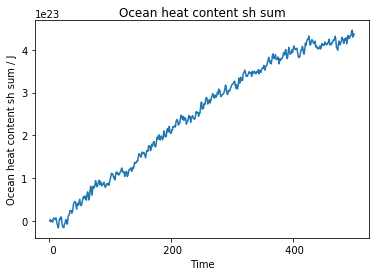

In [29]:
qplt.plot(ohc_sh_anom_cube)
plt.show()

In [31]:
ohc_sh_cube.data.mean()

9.0995090673345234e+26

In [32]:
ohc_nh_cube.data.mean()

6.1545298769705525e+26

In [33]:
ohc_sh_cube.data.mean() + ohc_nh_cube.data.mean()

1.5254038944305075e+27

In [34]:
ohc_global_cube = ohc_sh_cube.copy()
ohc_global_cube.data = ohc_sh_cube.data + ohc_nh_cube.data

In [35]:
ohc_global_cube.data.mean()

1.5254038944305075e+27

In [37]:
print(ohc_global_cube)

ocean heat content sh sum / (J)     (time: 500)
     Dimension coordinates:
          time                           x
     Attributes:
          Conventions: CF-1.5
          associated_files: baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation gridspecFile: gridspec_ocean_fx_CSIRO-Mk3-6-0_piControl_r0i0p0.nc...
          branch_time: 0.0
          cmor_version: 2.5.9
          comment: Data is stored on the native ocean T-grid on which the data was generated....
          contact: Project leaders: Stephen Jeffrey (Stephen.Jeffrey@qld.gov.au) & Leon Rotstayn...
          depth_bounds: OHC integrated over full depth of input data (5.000000 down to 4800.00...
          experiment: pre-industrial control
          experiment_id: piControl
          forcing: N/A (Pre-industrial conditions with all forcings fixed at 1850 levels)
          frequency: mon
          history: Mon Aug 28 09:58:17 2017: /g/data/r87/dbi599/miniconda3/envs/ocean/bin/python...
          initialization_method: 1


In [39]:
ohc_global_anom_cube = ohc_global_cube.copy()
ohc_global_anom_cube.data = ohc_global_cube.data - ohc_global_cube.data[0]

/g/data/r87/dbi599/miniconda3/envs/ocean/lib/python3.6/site-packages/matplotlib/ticker.py:1693: UserWarning: Steps argument should be a sequence of numbers
increasing from 1 to 10, inclusive. Behavior with
values outside this range is undefined, and will
raise a ValueError in future versions of mpl.
  warnings.warn('Steps argument should be a sequence of numbers\n'


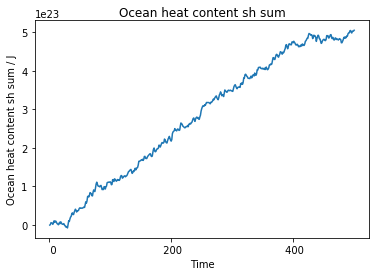

In [40]:
qplt.plot(ohc_global_anom_cube)
plt.show()